# This Code organizes data, detect outliers and plot
### to find the Extractant to metal stoichiometry
$$ E + n H^+ + n NO_3^- \leftrightarrow (E. n HNO_3)_{org}  $$

### read from the plot
 $$log \left( \frac{ [HNO_3]_{org}}{ [E]_{ini} - [HNO_3]_{org}} \right) \;\text{vs}\;log ([HNO_3]_{ini} -[HNO_3]_{org} ) $$

### Extractant: TODGA - n-dodecane

#### Coded by Leonardo da Silva Garcia Leite, Jan 2025
#### Dr. Aurora Clark's Group - University of Utah





In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#this is for the loess fitting
import statsmodels.api as sm
from sklearn import linear_model



# This configures the plots
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import matplotlib.ticker
from matplotlib.ticker import MaxNLocator

# Adjusting tick label size
#plt.tick_params(axis='both', labelsize=25)  # 20 is an example size; adjust as needed.


# Set maximum number of ticks to 5
mpl.ticker.MaxNLocator.default_params['nbins'] = 5  # Globally set maximum ticks
## Set maximum number of ticks to 5
#axii.xaxis.set_major_locator(MaxNLocator(5))  # For x-axis
#axii.yaxis.set_major_locator(MaxNLocator(5))  # For y-axis
#

#second try to ajust sizes of parameters


#second try to ajust sizes of parameters


fontScaling= 1

# Desired font sizes and tick size
label_fontsize = fontScaling*12  # pt
title_fontsize = fontScaling*14  # pt
tick_fontsize = fontScaling*10   # pt (you can adjust this as needed)
legend_fontsize = fontScaling*10
desired_width = 4.2#8.4#4.2 #6    # inches (adjust as needed)  , 1 inch = 72 points (pt)
border_thickness = 1.5 #t
tick_thickness = 1.5 # pt
scatter_size = 50
plot_linewidth = 1.0

# Use mpl.update to apply rcParams globally
mpl.rcParams.update({
    'text.usetex': False,  # Use LaTeX for text rendering
    'font.size': label_fontsize,  # Base font size for labels
    'axes.titlesize': title_fontsize,  # Title font size
    'axes.labelsize': label_fontsize,  # Label font size
    'xtick.labelsize': tick_fontsize,  # x-axis tick label size
    'ytick.labelsize': tick_fontsize,  # y-axis tick label size
    'xtick.major.width': tick_thickness,
    'ytick.major.width': tick_thickness,
    'xtick.direction': 'in',  # Move x-axis ticks inside
    'ytick.direction': 'in',  # Move y-axis ticks inside 
    'legend.fontsize': legend_fontsize,     # Legend font size
    'axes.linewidth': border_thickness,  # Border thickness for the entire plot
    'figure.figsize': [desired_width, desired_width * 0.75]  # Aspect ratio
})

print('reference font value:', label_fontsize/fontScaling,' font scaling:', fontScaling,' effective font size:',label_fontsize )
#xtick.minor.width



from sklearn.linear_model import LinearRegression

def R2adj(R:float, np: int, nfeatures:int ):
       return 1 - (1-R)*(0.3*np-1)/(0.3*np-nfeatures-1)

def fitError(X,y):
    #http://laboratoriodefisicaufla.blogspot.com/2013/10/metodo-dos-minimos-quadrados_12.html
    x=X.reshape(-1)
    nlok=len(y)
    sumx = np.sum(x)
    sumy = np.sum(y)
    sumxy = np.dot(x,y)
    sumx2 = np.dot(x,x)

    coefa0x = (sumx*sumy-nlok*sumxy)/(sumx*sumx - nlok*sumx2)
    coefa1 = (sumxy*sumx- sumx2*sumy)/(sumx*sumx-nlok*sumx2)


    #print('coefa0x:', coefa0x, 'coefa1:', coefa1, 'n', nlok)

    deltay = np.sqrt(np.dot( (coefa0x*x+coefa1 - y),(coefa0x*x+coefa1 - y))/(nlok-2))
    deltaa0x = deltay/ np.sqrt( np.dot( x-sumx/nlok,x-sumx/nlok)   )
    deltaa1 = np.sqrt(sumx2/nlok)*deltaa0x


    #print('delta y:', deltay, ' deltaa0x:', deltaa0x, ' deltaa1:', deltaa1, 'delakh:',np.abs(np.power(10, coefa1)*np.log(10))*deltaa1)
    return deltaa0x, np.abs(np.power(10, coefa1)*np.log(10))*deltaa1

reference font value: 12.0  font scaling: 1  effective font size: 12


In [2]:
df = pd.read_csv("csvData/articledataDBmerged4.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
df

,cid,cid_PM,cid_solvent,cid_acid,CextratantEq (M),ExtractantName,Cextractant (M),AverageAggregateSize (A),Nextractantmol,ExtractantMonomer (%),...,Rotatable bond count_acid,H bond donor count_acid,H bond acceptor count_acid,Charge_acid,Covalent Unit count_acid,TPSA_acid,Wiener_acid,Branching Index_acid,Polarity Index_acid,Heterogeneity Index_acid
0,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
1,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
2,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
3,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
4,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8161,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.02,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8162,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.08,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8163,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.06,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8164,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.04,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708


In [21]:
df['ExtractantName'].value_counts()

TODGA        3937
TEHDGA       1189
TBP          1040
DEHiBA        499
DMDODGA       258
DEHBA         236
DMDOHEMA      129
DHOA          124
TDDGA         120
TBDGA         117
D3DODGA        70
DOHyA          68
THDGA          62
DEHDODGA       50
DEHPRA         38
DEHAA          38
DEHPVA         36
DHEHHA         27
MIDOA          25
HDEHDGA        23
DMDBTDMA       20
TDdDGA         14
TDGA           13
Me2-TODGA      12
TPDGA           5
TOA             4
DBEHHA          2
DEHHA           2
DOOA            2
DBBA            2
DBHA            2
DHHA            1
BHHA            1
Name: ExtractantName, dtype: int64

In [5]:
##Calculates the D values if the Extraction is known...
def Dacid(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']
    if ((cacidorg>0) & (cacid>0)):
        return (cacidorg)/(cacid-cacidorg)

df['Dacid (calc)'] = df.apply(Dacid, axis=1)


In [6]:
#calculate log of some fields..
def logDacid(row):
    Dacid = row['Dacid (calc)']
    if (Dacid>0) :
        return np.log10(Dacid)

def logAcid(row):
    HNO3ini = row['Cacid (M)']
    if (HNO3ini>0) :
        return np.log10(HNO3ini)

def logAcidOrg(row):
    HNO3org = row['CacidOrg (M)']
    if (HNO3org>0) :
        return np.log10(HNO3org)

##Calculates the D values if the Extraction is known...
def logExtractant(row):
    Extractantini = row['Cextractant (M)']
    if (Extractantini > 0) :
        return np.log10(Extractantini)

df['logAcid'] = df.apply(logAcid, axis=1)
df['logAcidOrg'] = df.apply(logAcidOrg, axis=1)
df['logDacid'] = df.apply(logDacid, axis=1)
df['logExtractant'] = df.apply(logExtractant, axis=1)

In [7]:
# to calculate kh for fixed acidity guoxin style
def logAcidOrg_aq(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']
    if ((cacidorg>0) & (cacid>0)):
        return np.log10(cacidorg)-2*np.log10(cacid-cacidorg)

def logExtractant_AcidOrg(row):
    cacidorg = row['CacidOrg (M)']
    cextrac = row['Cextractant (M)']
    if ((cextrac - cacidorg)>0 ):
        return np.log10(cextrac-cacidorg)


# to calculate kh for fixed [DGA]
def logAcidOrg_aqExtractant(row):
    cacidorg = row['CacidOrg (M)']
    cextrac = row['Cextractant (M)']
    if ((cacidorg -cextrac) and (cacidorg>0)):
        return np.log10(cacidorg)-np.log10(cextrac-cacidorg)

def logAcidOrgAcid(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']

    if ((cacidorg>0) & (cacid>0)):
        return np.log10(cacid-cacidorg)


df['logAcidOrg_aq'] = df.apply(logAcidOrg_aq, axis=1)
df['logExtractant_AcidOrg'] = df.apply(logExtractant_AcidOrg, axis=1)

df['logAcidOrg_aqExtractant'] = df.apply(logAcidOrg_aqExtractant, axis=1)
df['logAcidOrgAcid'] = df.apply(logAcidOrgAcid, axis=1)

/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_62480/1665782252.py:6: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacidorg)-2*np.log10(cacid-cacidorg)
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_62480/1665782252.py:20: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacidorg)-np.log10(cextrac-cacidorg)
/var/folders/3m/_fnws_9153ldq3pbk9643lgm0000gn/T/ipykernel_62480/1665782252.py:27: RuntimeWarning: invalid value encountered in log10
  return np.log10(cacid-cacidorg)


In [8]:
'''
This function will fit lines to through a set of points of the curve passed...
If there are two different linear sections the function will return two different fittings


Y = A*x + B  , the polynomial fit, fits p(x) = xn[0]^n * p[0]+...+p[n]


'''


def find_closest_index(vector, target):
    vector = np.array(vector)  # Convert the list to a numpy array for efficient computation
    index = np.abs(vector - target).argmin()  # Find the index of the minimum absolute difference
    return index

def calculateCAC2linesCluster(df, name, fixedAcid, endred,iniblue ):

    #df passed should be x and y only
    npoints = len(df.index)
    bestAForward = 0
    bestBForward = 0
    bestABackward = 0
    bestBBackward = 0
    bestPoints = 0

    bestResidualsForward = 99999
    bestResidualsBackward = 99999

    #get all values
    x = df.iloc[:,0].values
    y = df.iloc[:,1].values

    #find the points correspondent to the value
    try:
        indexred = find_closest_index(x,endred)
    except:
        indexred = 0.5*npoints
        print('Index not found, using half of data as middle point')
    
    try:
        indexblue = find_closest_index(x,iniblue)
    except:
        indexblue = 0.5*npoints
        print('Index not found, using half of data as middle point')
    
    #print('index red', indexred, 'index blue', indexblue)
    #print('x red',x[indexred], 'xblue', x[indexblue])
        
    #blue, forward fitting    
    if npoints < 2:
        print("Data from:", name, " is too short: ",npoints)

    else:
        #for i in range(3,npoints):  #scans forward fitting

        px,r,_,_,_ = np.polyfit( x[indexblue:], y[indexblue:],1, full=True)
        #print('i:',i, ' r:',r )


        if ( r.size>0)  and (r < bestResidualsForward):
            # Calculate predicted values for the PARTIAL dataset
            y_pred = np.polyval(px, x[indexblue:])
            # Calculate the mean of observed data
            y_mean = np.mean(y[indexblue:])
            # Compute Total Sum of Squares (SST)
            sst = np.sum((y[indexblue:] - y_mean) ** 2)
            # Compute Sum of Squares of Residuals (SSR)
            ssr = np.sum((y[indexblue:] - y_pred) ** 2)
            # Calculate R^2
            r2 = 1 - (ssr / sst)
            
            bestResidualsForward = r2
            bestAForward = px[0]
            bestBForward = px[1]
            bestPoints = indexblue

        print('Best results forward: ini:',bestPoints,':',npoints,' fitted the line:',bestAForward,'*x +',bestBForward, ' residuals:',bestResidualsForward)

        if (fixedAcid == True):
            print('Stoichometry forward:',bestAForward, ' Kh: ',np.power(10, bestBForward) )
        else:
            print('Stoichometry forward:',0.5*bestAForward, ' Kh: ',np.power(10, bestBForward) )



        #fitting red, backward fit
        px,r,_,_,_ = np.polyfit( x[0:indexred], y[0:indexred],1, full=True)

        if ( r.size>0)  and (r < bestResidualsBackward):
            
            # Calculate predicted values for the PARTIAL dataset
            y_pred = np.polyval(px, x[0:indexred])
            # Calculate the mean of observed data
            y_mean = np.mean(y[0:indexred])
            # Compute Total Sum of Squares (SST)
            sst = np.sum((y[0:indexred] - y_mean) ** 2)
            # Compute Sum of Squares of Residuals (SSR)
            ssr = np.sum((y[0:indexred] - y_pred) ** 2)
            # Calculate R^2
            r2 = 1 - (ssr / sst)
            
            bestResidualsBackward = r2
            bestABackward = px[0]
            bestBBackward = px[1]
            bestPoints = indexred#int(percent*npoints)#i

        print('Best results backward: ini: 0:',bestPoints,' fitted the line:',bestABackward,'*x +',bestBBackward, ' residuals:',bestResidualsBackward)
        if (fixedAcid == True):
            print('Stoichometry backward:',bestABackward, ' Kh: ',np.power(10, bestBBackward) )
        else:
            print('Stoichometry backward:',0.5*bestABackward, ' Kh: ',np.power(10, bestBBackward) )


        if np.abs(bestABackward-bestAForward) < 0.0001:
            print('ERROR - 2 LINE FITTING : LINES DO NOT INTERCEPT')
            return 0
        else:
            #(b2-b1)/(m1-m2)  kink is x intersection
            kink =  (bestBForward-bestBBackward)/(bestABackward-bestAForward)

        if( (kink > x.max()) or (kink<x.min())):
            print('ERROR - 2 LINE FITTING DOES NOT INTERCEPT IN VALID RANGE:', kink, '(',x.min(),x.max(),')')
            #return 0

        xnew = x # np.linspace(x[0],x[-1],50)


        if (fixedAcid==True):
            critAcid = df['Cacid (M)'].iloc[0]
            yCrit = bestAForward*kink+bestBForward

            #ycrit is complicated, [H]org,eq = ([H]aq,0 + 1/2*1/10^y) -sqrt( ([H]aq,0 + 1/2*1/10^y)^2 - [H]aq,0^2)
            cacidOrgCrit = critAcid + 0.5*np.power(10,-yCrit) - np.sqrt( np.power(critAcid + 0.5*np.power(10,-yCrit),2 ) -  critAcid*critAcid )
            cmcExtractant = np.power(10,kink) + cacidOrgCrit     #x = log(Extract,0 - [H]org,eq)

            print('kink is in ',kink, 'Critical extractant is:', cmcExtractant, ' critical acid is:',critAcid , 'critAcidOrg:', cacidOrgCrit )

            axii.plot(xnew,bestAForward*xnew+bestBForward, c='blue', alpha=0.5, 
                      label=f'Extractant* = {cmcExtractant:.2f} stoich = {bestAForward}', lw=plot_linewidth)
            axii.plot(xnew,bestABackward*xnew+bestBBackward, c='red', alpha=0.5, 
                      label=f'Acid* = {critAcid:.2f} CacidOrg*={cacidOrgCrit:.2f} stoich = {bestABackward:.2f}', lw=plot_linewidth)

        else:
            
            yCrit = bestAForward*kink+bestBForward
            cacidOrgCrit = df['Cextractant (M)'].iloc[0] /(np.power(10, -yCrit) +1)
            
            cmcacid = np.power(10, kink) - cacidOrgCrit
            print('kink is in ',kink, 'Critical acidity:', cmcacid, 'Critical Extractant is', df['Cextractant (M)'].iloc[0] )
            axii.plot(x[indexblue:],bestAForward*x[indexblue:]+bestBForward, c='blue', alpha=0.5,
                      label=f'Acid* = {cmcacid:.2f} stoich = {0.5*bestAForward:.2f}   R2:{bestResidualsForward:.2f} ',
                     lw=plot_linewidth) #R2:{bestResidualsForward:.3f}
            axii.plot(x[:indexred],bestABackward*x[:indexred]+bestBBackward, c='red', alpha=0.5, 
                      label=f'CacidOrg*={cacidOrgCrit:.2f} stoich = {0.5*bestABackward:.2f} R2:{bestResidualsBackward:.2f} ',
                     lw=plot_linewidth) #R2:{bestResidualsBackward:.3f}

        
        axii.axvline(x = x[indexred], color = 'blue', alpha=0.015, lw=plot_linewidth)
        axii.axvline(x = x[indexblue], color = 'blue', alpha=0.015, lw=plot_linewidth)

        axii.axvline(x = kink, color = 'green', alpha=0.15, lw=plot_linewidth)

    if (fixedAcid==True):
        return cmcExtractant, bestABackward, bestAForward
    else:
        return cmcacid, bestABackward*0.5, bestAForward*0.5

In [9]:
''' selecting only data that are in good format to be fitted (no ions or phase modifier)'''

df1 = df.loc[ 
              (df['Cacid (M)'] < 10) & (df['has ions?'] ==0) & (df['has PM?'] ==0)
              &(df['CacidOrg (M)']>0)
              & (df['logExtractant_AcidOrg'].isna()== False) # needed for the plots

].copy()

Number of usefull fittings:  0
number of points: 114
{'ansari2013', 'parvathy2020FTIR2', 'narayanan2024', 'woodhead2019', 'yaita2004', 'parvathy2020', 'parvathy2022insight', 'tachimori2002', 'nave2004', 'arisaka2011', 'swami2018', 'swami2020MD', 'Bell2012'}
13


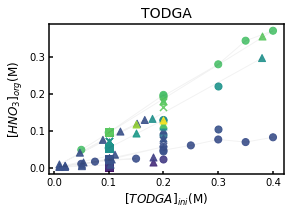

In [11]:
'''  this clusters data to analyze fixed acid vary extractatn.'''
#''' Hno_org - [Extractant] space '''
# resulting grouped data will be stored in a new dataframe dfR #


groupData = False


s1 = ['webplot1','webplot2','webplot3']
s2 = ['plotdigitizer1','plotdigitizer2','plotdigitizer3']
s3 = ['graphreader1','graphreader2','graphreader3','table']
m1 = ['webplotM', 'plotdigitizerM', 'graphreaderM','table']

dfR = df1.loc[
    
    (df1['ExtractantName'] == 'TODGA')
    & (df1['extractionRun'].isin(m1))

].copy()


markers_map = {
    'exxsol D80': 'o',  # Circle marker
    'ndodecane': '^',  # Triangle marker
    'kerosene': 's',  # Square marker
    'nheptane': 'H', #hexagon
    'noctane' : '*'
}
color_map = plt.get_cmap('viridis')  # Choose a colormap for Cacid values


#this is clustering of data
binsExtractant = [0.0,0.05,0.1,0.15,0.175,0.25,0.3,0.35,0.37,0.4,0.45]
binsExtractant_upper = [0.02, 0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.4,0.45]

if groupData:
    bin_indices = np.digitize(dfR['Cextractant (M)'], binsExtractant, right=False) - 1
    dfR['Cextractant (M)']  = np.take(binsExtractant_upper,bin_indices)
    


fig, axii = plt.subplots()

k2 = 0
paperNames = []

for g,d in dfR.sort_values(by='Cacid (M)').groupby([ dfR['Temp (K)'], dfR['ExtractantName'],dfR['AcidName'],dfR['Cacid (M)'], dfR['SolventName'], dfR['ref citation']]):
    
        #do some fitting with the data
        x = d['Cextractant (M)'] # d['logExtractant_AcidOrg'].values.reshape(-1,1)
        y = d['CacidOrg (M)']    #d['logAcidOrg_aq'].values
        temperature = g[0]

        if(len(x)>0):    

        
            paperNames.append(g[-1])
            markerget = markers_map.get(d['SolventName'].iloc[0],'x')
            
            # Normalize temperature values to [0, 1] for colormap       
            normalized_temps = (d['Cacid (M)']/dfR['Cacid (M)'].max())
            
            # Assign colors based on normalized temperatures using the chosen colormap
            colors = color_map(normalized_temps)
            

            axii.plot(x,y,color='black', alpha=0.05, linewidth=plot_linewidth)
            axii.scatter(x,y, label = f'{g}', marker=markerget,c=colors,
                         s=scatter_size,
                         alpha=0.9)
            
            axii.set_title(g[1])
            axii.set_xlabel(r'$[TODGA]_{ini}$(M)')
            axii.set_ylabel(r'$[HNO_3]_{org}$(M)')


print('Number of usefull fittings: ', k2)
print('number of points:',len(dfR))
print(set(paperNames))
print(len(set(paperNames)))

#plt.colorbar(plt.cm.ScalarMappable(cmap=color_map), label=r'$[Acid]_{ini}$')  # Add colorbar for temperature


axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
axii.legend().set_visible(False)
#fig.set_size_inches(11.0, 8.0, forward=True)
fig.tight_layout()
plt.show()



Number of usefull fittings:  0
[]
number of points 114


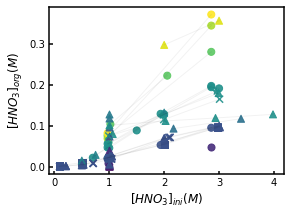

In [12]:
'''  this clusters data to analyze fixed acid vary extractant.'''
#''' HNO3_org - [HNO3]_ini space '''
# resulting grouped data will be stored in updated dfR #


groupData = False


markers_map = {
    'exxsol D80': 'o',  # Circle marker
    'ndodecane': '^',  # Triangle marker
    'kerosene': 's',  # Square marker
    'nheptane': 'H', #hexagon
    'noctane' : '*'
}
color_map = plt.get_cmap('viridis')  # Choose a colormap for temperature values

#this is clustering of data
binsAcid = [0.0, 0.250, 0.79, 1.25, 1.75, 2.5, 3.5, 3.8, 4.5, 5.0, 5.0, 5.5, 5.5, 5.5, 6.0, 6.0]
binsAcid_upper = [0.02,0.5,1.0,1.5,2,3,3.5,4,4.5]


if groupData:
    bin_indices = np.digitize(dfR['Cacid (M)'], binsAcid, right=True) - 1
    dfR['Cacid (M)'] = np.take(binsAcid_upper,bin_indices)


fig, axii = plt.subplots()


k2 = 0
paperNames = []

for g,d in dfR.sort_values(by='Cacid (M)').groupby([ dfR['Temp (K)'], dfR['ExtractantName'],dfR['Cextractant (M)'],dfR['AcidName'], dfR['SolventName'], dfR['ref citation']]):

        #do some fitting with the data
        x = d['Cacid (M)'] # d['logExtractant_AcidOrg'].values.reshape(-1,1)
        y = d['CacidOrg (M)']    #d['logAcidOrg_aq'].values
        temperature = g[0]        
       
        
        if(len(x)>0):

            
            markerget = markers_map.get(d['SolventName'].iloc[0],'x')
            # Normalize temperature values to [0, 1] for colormap
            normalized_temps = (d['Cextractant (M)']/dfR['Cextractant (M)'].max())
          
            # Assign colors based on normalized temperatures using the chosen colormap
            colors = color_map(normalized_temps)

            axii.plot(x,y,color='black', alpha=0.05, lw=plot_linewidth)
            axii.scatter(x,y, label = f'{g[0]} , {g[1]} , {g[2]:.2f} , {g[4]} , {g[5]}', marker=markerget, c=colors,# c=d['color'], #c=colors,
                         s=scatter_size,
                         alpha=0.9)
            
            axii.set_xlabel(r'$[HNO_3]_{ini}(M)$')
            axii.set_ylabel(r'$[HNO_3]_{org}(M)$')


print('Number of usefull fittings: ', k2)
print(paperNames)
print('number of points', len(dfR))

axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
axii.legend().set_visible(False)
#fig.set_size_inches(11.0, 8.0, forward=True)
fig.tight_layout()
plt.show()

Number of usefull fittings:  0
number of points: 114
{'ansari2013', 'parvathy2020FTIR2', 'narayanan2024', 'woodhead2019', 'yaita2004', 'parvathy2020', 'parvathy2022insight', 'tachimori2002', 'nave2004', 'arisaka2011', 'swami2018', 'swami2020MD', 'Bell2012'}
13


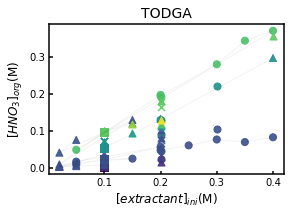

Number of usefull fittings:  0
[]
number of points 114


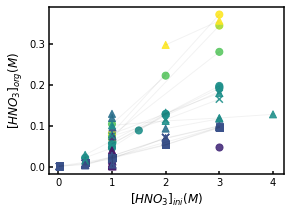

In [13]:
'''Order the points for outlier removal'''
'''  this clusters data to analyze fixed acid vary extractatn.'''

groupData = True


s1 = ['webplot1','webplot2','webplot3']
s2 = ['plotdigitizer1','plotdigitizer2','plotdigitizer3']
s3 = ['graphreader1','graphreader2','graphreader3','table']
m1 = ['webplotM', 'plotdigitizerM', 'graphreaderM','table']

dfR = df1.loc[
    
    (df1['ExtractantName'] == 'TODGA')
    & (df1['extractionRun'].isin(m1))

].copy()


markers_map = {
    'exxsol D80': 'o',  # Circle marker
    'ndodecane': '^',  # Triangle marker
    'kerosene': 's',  # Square marker
    'nheptane': 'H', #hexagon
    'noctane' : '*'
}
color_map = plt.get_cmap('viridis')  # Choose a colormap for Cacid values


#this is clustering of data
binsExtractant = [0.0,0.05,0.1,0.15,0.175,0.25,0.3,0.35,0.37,0.4,0.45]
binsExtractant_upper = [0.02, 0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.4,0.45]


if groupData:
    bin_indices = np.digitize(dfR['Cextractant (M)'], binsExtractant, right=False) - 1
    dfR['Cextractant (M)']  = np.take(binsExtractant_upper,bin_indices)
    


fig, axii = plt.subplots()

k2 = 0
paperNames = []
# dfR['extractionRun'],
for g,d in dfR.sort_values(by='Cacid (M)').groupby([ dfR['Temp (K)'], dfR['ExtractantName'],dfR['AcidName'],dfR['Cacid (M)'], dfR['SolventName'], dfR['ref citation']]):

        #do some fitting with the data
        x = d['Cextractant (M)'] # d['logExtractant_AcidOrg'].values.reshape(-1,1)
        y = d['CacidOrg (M)']    #d['logAcidOrg_aq'].values
        temperature = g[0]
        

        if(len(x)>0):    
        
            paperNames.append(g[-1])
            markerget = markers_map.get(d['SolventName'].iloc[0],'x')
            # Normalize temperature values to [0, 1] for colormap
            normalized_temps = (d['Cacid (M)']/dfR['Cacid (M)'].max())
            
            # Assign colors based on normalized temperatures using the chosen colormap
            colors = color_map(normalized_temps)
            

            axii.plot(x,y,color='black', alpha=0.05, linewidth=plot_linewidth)
            axii.scatter(x,y, label = f'{g}', marker=markerget,c=colors,#c=d['color'], #  #
                         s=scatter_size,
                         alpha=0.9)
            
            axii.set_title(g[1])
            axii.set_xlabel(r'$[extractant]_{ini}$(M)')
            axii.set_ylabel(r'$[HNO_3]_{org}$(M)')

print('Number of usefull fittings: ', k2)
print('number of points:',len(dfR))
print(set(paperNames))
print(len(set(paperNames)))


axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
axii.legend().set_visible(False)
#fig.set_size_inches(11.0, 8.0, forward=True)
fig.tight_layout()
plt.show()


'''  this clusters data to analyze fixed acid vary extractant.'''

groupData = True

#this is clustering of data
binsAcid = [0.0, 0.250, 0.79, 1.25, 1.75, 2.5, 3.5, 3.8, 4.5, 5.0, 5.0, 5.5, 5.5, 5.5, 6.0, 6.0]
binsAcid_upper = [0.02,0.5,1.0,1.5,2,3,3.5,4,4.5]


if groupData:
    bin_indices = np.digitize(dfR['Cacid (M)'], binsAcid, right=True) - 1
    dfR['Cacid (M)'] = np.take(binsAcid_upper,bin_indices)


fig, axii = plt.subplots()

k2 = 0
paperNames = []

for g,d in dfR.sort_values(by='Cacid (M)').groupby([ dfR['Temp (K)'], dfR['ExtractantName'],dfR['Cextractant (M)'],dfR['AcidName'], dfR['SolventName'], dfR['ref citation']]):

        #do some fitting with the data
        x = d['Cacid (M)'] # d['logExtractant_AcidOrg'].values.reshape(-1,1)
        y = d['CacidOrg (M)']    #d['logAcidOrg_aq'].values
        temperature = g[0]        
        
        if(len(x)>0):
 
            markerget = markers_map.get(d['SolventName'].iloc[0],'x')
            # Normalize temperature values to [0, 1] for colormap
            normalized_temps = (d['Cextractant (M)']/dfR['Cextractant (M)'].max())
            
            # Assign colors based on normalized temperatures using the chosen colormap
            colors = color_map(normalized_temps)

            axii.plot(x,y,color='black', alpha=0.05, lw=plot_linewidth)
            axii.scatter(x,y, label = f'{g[0]} , {g[1]} , {g[2]:.2f} , {g[4]} , {g[5]}', marker=markerget, c=colors,# c=d['color'], #c=colors,
                         s=scatter_size,
                         alpha=0.9)
            
            axii.set_xlabel(r'$[HNO_3]_{ini}(M)$')
            axii.set_ylabel(r'$[HNO_3]_{org}(M)$')


print('Number of usefull fittings: ', k2)
print(paperNames)
print('number of points', len(dfR))

axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5), fontsize='10')
axii.legend().set_visible(False)
#fig.set_size_inches(11.0, 8.0, forward=True)
fig.tight_layout()
plt.show()

6  outliers removed after k 3  interations,  [974, 975, 2829, 973, 2823, 2740]
[Extractant]: 0.02  #points 5
[Extractant]: 0.05  #points 5
[Extractant]: 0.1  #points 59
[Extractant]: 0.15  #points 3
[Extractant]: 0.2  #points 25
[Extractant]: 0.25  #points 1
[Extractant]: 0.3  #points 4
[Extractant]: 0.35  #points 2
[Extractant]: 0.4  #points 4


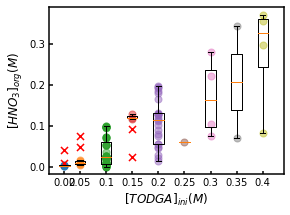

9  outliers removed after k 2  interations,  [2477, 2805, 998, 999, 2473, 2772, 2472, 2817, 2816]
[Acid]: 0.02  #points 9
[Acid]: 0.5  #points 13
[Acid]: 1.0  #points 46
[Acid]: 1.5  #points 1
[Acid]: 2.0  #points 16
[Acid]: 3.0  #points 19
[Acid]: 4.0  #points 1


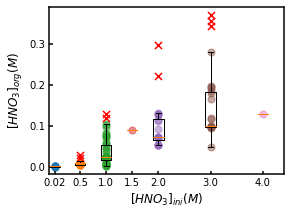

In [14]:
def find_outliers(data):
    #function to detect the outliers indices from boxplot
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (1.5 * iqr)
    upper_bound = quartile_3 + (1.5 * iqr)
  
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    return outliers,[lower_bound,upper_bound]


##----------------Outlier in [E] - [Acid]_org  space------------------------##

fig, axii = plt.subplots()

# Collect unique extractant values for x-axis limits
extractant_values = dfR['Cextractant (M)'].unique()
x_min, x_max = -.01 , 1.1*extractant_values.max() 

dfred = dfR.copy()
tempOutliers = 1
listOutlierse = []
k=0
while tempOutliers>0:
    k+= 1
    tempOutliers = 0

    indices_outliers = []
    for g,d in dfred.sort_values(by='Cextractant (M)').groupby([ dfred['Cextractant (M)']]):
        #axii.boxplot( d['CacidOrg (M)'], positions=[d['Cextractant (M)'].iloc[0]], widths=0.02)#, patch_artist=True)
        #axii.scatter(d['Cextractant (M)'], d['CacidOrg (M)'], alpha=0.5)

        outliers,lwupbounds = find_outliers(d['CacidOrg (M)']) #for y axis
        indices_outliers = d.loc[(d['CacidOrg (M)'] < lwupbounds[0]) | (d['CacidOrg (M)'] > lwupbounds[1])  ].index
        
        # Append only non-empty lists of indices
        if not indices_outliers.empty:
            listOutlierse.extend(indices_outliers.tolist())

        tempOutliers += len(outliers)
        dfred = dfred.drop(indices_outliers)

print(len(listOutlierse),' outliers removed after k', k, ' interations, ', listOutlierse)
        

for g,d in dfred.sort_values(by='Cextractant (M)').groupby([ dfred['Cextractant (M)']]):
    axii.boxplot( d['CacidOrg (M)'], positions=[d['Cextractant (M)'].iloc[0]], widths=0.02)#, patch_artist=True)
    axii.scatter(d['Cextractant (M)'], d['CacidOrg (M)'], alpha=0.5, s=scatter_size)

    print('[Extractant]:',d['Cextractant (M)'].iloc[0], ' #points', len(d))

#plot the outlier points
for item in listOutlierse:
    axii.scatter(dfR.loc[item]['Cextractant (M)'], dfR.loc[item]['CacidOrg (M)'], c='red', s=scatter_size, marker='x' ) #for x axis

# Set x-axis limits
axii.set_xlim(x_min, x_max)

# Add labels, title, and legend
axii.set_xlabel(r'$[TODGA]_{ini} (M)$')
axii.set_ylabel(r'$[HNO_3]_{org} (M)$')

#fig.set_size_inches(11.0, 8.0, forward=True)
fig.tight_layout()
plt.show()

##----------------Outlier in [Acid] - [Acid]_org  space------------------------##


fig, axii = plt.subplots()

# Collect unique extractant values for x-axis limits
extractant_values = dfR['Cacid (M)'].unique()
x_min, x_max = -0.1 , 1.1*extractant_values.max() 

dfred = dfR.copy()
tempOutliers = 1
listOutliersa = []
k=0
while tempOutliers>0:
    k+= 1
    tempOutliers = 0

    indices_outliers = []
    for g,d in dfred.sort_values(by='Cacid (M)').groupby([ dfred['Cacid (M)']]):
        #axii.boxplot( d['CacidOrg (M)'], positions=[d['Cextractant (M)'].iloc[0]], widths=0.02)#, patch_artist=True)
        #axii.scatter(d['Cextractant (M)'], d['CacidOrg (M)'], alpha=0.5)

        outliers,lwupbounds = find_outliers(d['CacidOrg (M)']) #for y axis
        indices_outliers = d.loc[(d['CacidOrg (M)'] < lwupbounds[0]) | (d['CacidOrg (M)'] > lwupbounds[1])  ].index
        
        # Append only non-empty lists of indices
        if not indices_outliers.empty:
            listOutliersa.extend(indices_outliers.tolist())

        tempOutliers += len(outliers)
        dfred = dfred.drop(indices_outliers)

print(len(listOutliersa),' outliers removed after k', k, ' interations, ', listOutliersa)
        
#plot the box plots
for g,d in dfred.sort_values(by='Cacid (M)').groupby([ dfred['Cacid (M)']]):
    axii.boxplot( d['CacidOrg (M)'], positions=[d['Cacid (M)'].iloc[0]], widths=0.2)#, patch_artist=True)
    axii.scatter(d['Cacid (M)'], d['CacidOrg (M)'], alpha=0.5,s=scatter_size)

    print('[Acid]:',d['Cacid (M)'].iloc[0], ' #points', len(d))

#plot the outliers
for item in listOutliersa:
    #print('item', item)
    axii.scatter(dfR.loc[item]['Cacid (M)'], dfR.loc[item]['CacidOrg (M)'], c='red', s=scatter_size, marker='x' ) #for x axis

# Set x-axis limits
axii.set_xlim(x_min, x_max)

# Add labels, title, and legend
axii.set_xlabel(r'$[HNO_3]_{ini} (M)$')
axii.set_ylabel(r'$[HNO_3]_{org} (M)$')


#fig.set_size_inches(11.0, 8.0, forward=True)
fig.tight_layout()
plt.show()

number of points 55
Acid range 0.02 3.0
line fitting
 coef: [2.23093995]   stoichiometry: [1.11546997]  +/- 0.13751498555667918
 The values Kh: 0.5092688828314292 +/- 0.07198591333747609    from intercept: -0.2930528591221894
Delta G: - RT ln Kh =  17.849650492975567 +/- 3.739111737636455  kJ/mol


Estimated coefficients (true, linear regression, RANSAC):
[2.51220737] -0.3392046948337382
Best results forward: ini: 39 : 55  fitted the line: 7.61020457734699 *x + -2.0137709222043174  residuals: 0.9517783661923197
Stoichometry forward: 3.805102288673495  Kh:  0.009687887295877346
Best results backward: ini: 0: 39  fitted the line: 1.4977292351966895 *x + -0.6322992316695302  residuals: 0.850966479655989
Stoichometry backward: 0.7488646175983448  Kh:  0.23318508485387127
kink is in  0.2260085502527035 Critical acidity: 1.64900286721544 Critical Extractant is 0.1
Number of usefull fittings:  0
[]


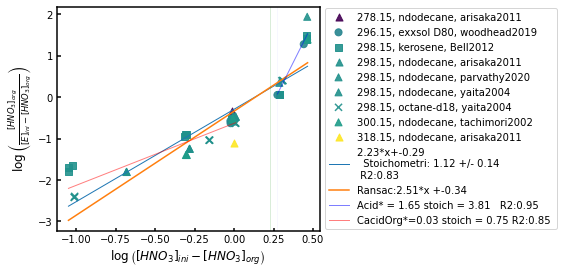

In [18]:
'''  this clusters data to analyze fixed extractantn varied acid case .'''
dfclean = dfred.loc[
    
    (dfred['ExtractantName'] == 'TODGA')
    
    & (dfred['Cextractant (M)'] > 0.098)  &(dfred['Cextractant (M)'] < 0.12) # necessary for todga0.1
    & (~dfred['ref citation'].isin(['parvathy2020FTIR2'])) #necessary for todga 0.1
    & (~dfred['ref citation'].isin(['ansari2013'])) #necessary for todga 0.1
   
   #  & (dfred['Cextractant (M)'] > 0.18)  & (dfred['Cextractant (M)'] < 0.25)  #necessary for todga 0.2
   # & (~dfred['SolventName'].isin(['exxsol D80'])) #necessary for todga 0.2
   # & (~dfred['ref citation'].isin(['parvathy2022insight'])) #necessary for todga 0.2
    

].copy()


markers_map = {
    'exxsol D80': 'o',  # Circle marker
    'ndodecane': '^',  # Triangle marker
    'kerosene': 's',  # Square marker
    'nheptane': 'H', #hexagon
    'noctane' : '*'
}
color_map = plt.get_cmap('viridis')  # Choose a colormap for temperature values



fig, axii = plt.subplots()

k2 = 0
npoints=0

paperNames = []
dfclean = dfclean.sort_values(by='logAcidOrgAcid')

for g,d in dfclean.sort_values(by='logAcidOrgAcid').groupby([ dfclean['Temp (K)'], dfclean['ExtractantName'],dfclean['Cextractant (M)'],dfclean['AcidName'], dfclean['SolventName'], dfclean['ref citation']]):

        #do some fitting with the data
        x = d['logAcidOrgAcid'].values.reshape(-1,1) 
        y = d['logAcidOrg_aqExtractant'].values 
        temperature = g[0]

        npoints += len(x)     
        if(len(x)>0): 
            markerget = markers_map.get(d['SolventName'].iloc[0],'x')
            
            # Normalize temperature values to [0, 1] for colormap
            normalized_temps = (d['Temp (K)'] - dfclean['Temp (K)'].min()) / (dfclean['Temp (K)'].max() - dfclean['Temp (K)'].min())

            # Assign colors based on normalized temperatures using the chosen colormap
            colors = color_map(normalized_temps)


            #axii.plot(x,y,color='black', alpha=0.05) #{g[0]}, {g[4]}, {g[5]}
            axii.scatter(x,y, label = f'{g[0]}, {g[4]}, {g[5]}', marker=markerget, c=colors, #c=d['color'], #
                         s=scatter_size,
                         alpha=0.9)
               
            axii.set_xlabel(r'$\log \left([HNO_3]_{ini} - [HNO_3]_{org}\right)$')
            axii.set_ylabel(r'$\log \left( \frac{ [HNO_3]_{org}}{ [E]_{ini} - [HNO_3]_{org}} \right)$')

        
#do some fitting with the data
x = dfclean['logAcidOrgAcid'].values.reshape(-1,1) 
y = dfclean['logAcidOrg_aqExtractant'].values 
print('number of points', len(x))
print('Acid range', np.min(dfclean['Cacid (M)']), np.max(dfclean['Cacid (M)']))

model = LinearRegression().fit(x,y)
dstoich, dkh = fitError(x,y)

kh = np.power(10,model.intercept_)
stoichNHto1E = 0.5*model.coef_
DeltaG = -8.3145*temperature*np.log(kh)/100
DeltaGerror = 8.3145*temperature*np.abs(1/kh)*dkh/100
axii.plot( x ,(model.coef_)*x+(model.intercept_), alpha=1 ,
          label=f'{model.coef_[0]:.2f}*x+{model.intercept_:.2f} \n  Stoichometri: {0.5*model.coef_[0]:.2f} +/- {dstoich:.2f} \n R2:{model.score(x,y):.2f}',
         lw=plot_linewidth)
print('line fitting')
print(' coef:',model.coef_, '  stoichiometry:', stoichNHto1E, ' +/-', dstoich)
print(' The values Kh:',kh ,'+/-',dkh,'   from intercept:', model.intercept_ )
print('Delta G: - RT ln Kh = ', DeltaG, '+/-', DeltaGerror,' kJ/mol')
print('\n')


#some robust fitting on the data
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(x,y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
y_ransac = ransac.predict(x)

# Compare estimated coefficients
print("Estimated coefficients (true, linear regression, RANSAC):")
print(ransac.estimator_.coef_, ransac.estimator_.intercept_)
#axii.scatter(x[outlier_mask], y[outlier_mask], color="red", marker="x", label="Outliers", s=300)
axii.plot( x ,y_ransac, alpha=1 ,label=f'Ransac:{ransac.estimator_.coef_[0]:0.2f}*x +{ransac.estimator_.intercept_:0.2f} ')



cmcAcid = calculateCAC2linesCluster(dfclean[['logAcidOrgAcid','logAcidOrg_aqExtractant','Cextractant (M)']]
                          ,'All data' ,False,0.20,0.151)#np.log(1),np.log(1)) # for todga0.1
#                        ,'All data' ,False,0.30,0.30)#np.log(1),np.log(1)) # for todga0.1


print('Number of usefull fittings: ', k2)
print(paperNames)


axii.legend(loc = 'center left', bbox_to_anchor=(1,0.5))
fig.set_size_inches(8, 4, forward=True)

fig.tight_layout()
plt.show()


In [19]:
print(dfclean[['ref citation','ref DOI']].drop_duplicates())
print(dfred[['ref citation','ref DOI']].drop_duplicates())

       ref citation                                        ref DOI
1667       Bell2012              doi: 10.1016/j.proche.2012.10.026
6410      yaita2004                          10.1081/SEI-120039640
28    tachimori2002                         /10.1081/SEI-120016073
2794   woodhead2019  https://doi.org/10.1080/07366299.2019.1625201
764     arisaka2011              DOI: 10.1080/07366299.2011.539127
1431   parvathy2020           doi.org/10.1016/j.molliq.2020.113940
             ref citation                                         ref DOI
26          tachimori2002                          /10.1081/SEI-120016073
307             yaita2004                           10.1081/SEI-120039640
637             swami2018                   DOI: 10.1021/acs.iecr.8b02396
764           arisaka2011               DOI: 10.1080/07366299.2011.539127
966            ansari2013                      DOI: 10.1081/SEI-200066296
1431         parvathy2020            doi.org/10.1016/j.molliq.2020.113940
1587         